In [69]:
import numpy as np
from numpy import average , median
import cv2
import matplotlib.pyplot as plt
import glob

# a

In [70]:
def estimate_background(images, frameIds, method, plot=False):

    frames = []
    for fid in frameIds:
        frames.append(method(images[:fid], axis=(0)).astype('uint8'))
        
    if plot:
        fig, ax = plt.subplots(2,2,figsize=(8,6))
        for i in range(4):
            ax[i//2, i-2*(i//2)].imshow(frames[i])
            ax[i//2, i-2*(i//2)].set_title('Frame %s '%frameIds[i])
    return frames

In [71]:
files = glob.glob("frames\\*.png")
files.sort()
images = []
for f in files:
    img = cv2.imread(f)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    images.append(img)
images = np.array(images)

The result of average method


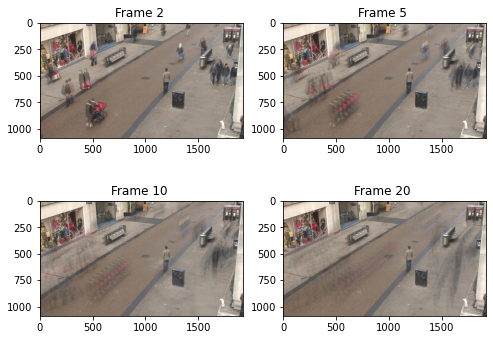

In [72]:
estimate_background(images,[2,5,10,20],plot=True,method=average)
print('The result of average method')

The result of median method


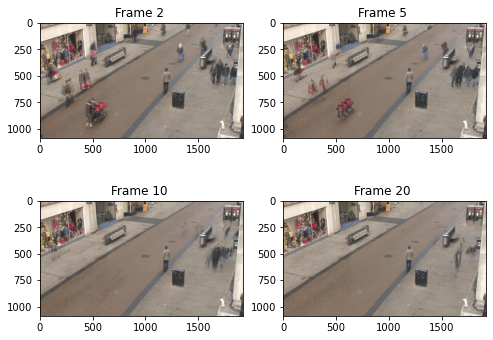

In [18]:
estimate_background(images, [2, 5, 10, 20], plot=True, method=median)
print('The result of median method')

# b

In [73]:
def Subtract_background(images, frameIds, frame, method , plot=False):

    backgrounds = estimate_background(images, frameIds, method)
    foreground = []
    for i in range(len(backgrounds)):

        subtract = cv2.absdiff(frame, backgrounds[i])
        subtract = cv2.cvtColor(subtract, cv2.COLOR_RGB2GRAY)
        foreground.append(subtract)
    if plot:
        fig, ax = plt.subplots(2,2 , figsize=(8,6))
        for i in range(4):
            ax[i//2, i-2*(i//2)].imshow(foreground[i], cmap="gray")
            ax[i//2, i-2*(i//2)].set_title('Frame %s '%frameIds[i])
    return foreground

In [74]:
files = glob.glob("frames\\*.png")
files.sort()
images = []
for f in files:
    img = cv2.imread(f)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    images.append(img)
images = np.array(images)

test_frame1 = cv2.imread("tests\\pedestrians_test_01.png")
test_frame1 = cv2.cvtColor(test_frame1, cv2.COLOR_BGR2RGB)

test_frame2 = cv2.imread("tests\\pedestrians_test_02.png")
test_frame2 = cv2.cvtColor(test_frame2, cv2.COLOR_BGR2RGB)

The result of average method


[array([[ 3,  2,  2, ...,  2,  3,  1],
        [ 4,  5,  5, ...,  2,  3,  1],
        [ 9,  9,  2, ...,  2,  3,  1],
        ...,
        [45, 44, 45, ...,  1,  7,  1],
        [37, 36, 37, ...,  2,  7,  1],
        [35, 36, 36, ...,  4,  1,  3]], dtype=uint8),
 array([[ 2,  2,  1, ...,  2,  4,  1],
        [ 5,  4,  5, ...,  2,  2,  1],
        [10,  6,  3, ...,  0,  3,  1],
        ...,
        [35, 35, 32, ...,  3,  7,  6],
        [25, 23, 25, ...,  4, 11,  6],
        [21, 20, 20, ...,  4,  3,  8]], dtype=uint8),
 array([[ 1,  2,  1, ...,  2,  3,  1],
        [ 4,  2,  3, ...,  2,  2,  1],
        [ 7,  3,  5, ...,  1,  3,  1],
        ...,
        [21, 20, 17, ...,  3,  7,  8],
        [13, 11, 12, ...,  5, 11,  9],
        [ 9,  9,  9, ...,  5,  3, 10]], dtype=uint8),
 array([[ 2,  2,  2, ...,  4,  1,  3],
        [ 5,  4,  4, ...,  4,  4,  2],
        [ 7,  4,  4, ...,  3,  2,  1],
        ...,
        [10, 10,  8, ...,  2,  8,  9],
        [ 5,  5,  5, ...,  3, 10, 10],
      

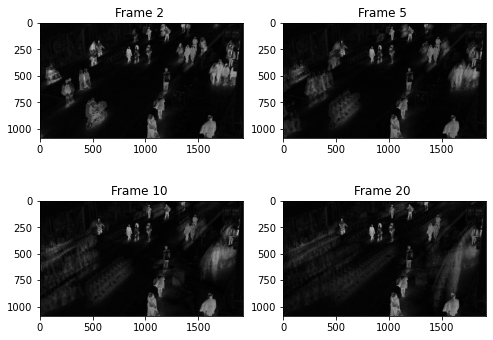

In [25]:
print('The result of average method')
Subtract_background(images,[2,5,10,20],test_frame1,plot=True,method=average)

The result of average method


[array([[ 7,  7,  2, ...,  2,  5,  1],
        [ 2,  4,  3, ...,  3,  7,  1],
        [ 9, 13,  8, ...,  2,  5,  1],
        ...,
        [46, 45, 49, ...,  7,  9,  7],
        [38, 41, 41, ...,  4,  3,  2],
        [36, 41, 41, ...,  6,  3,  4]], dtype=uint8),
 array([[ 6,  6,  0, ...,  3,  5,  3],
        [ 1,  2,  2, ...,  3,  8,  3],
        [10, 11,  5, ...,  4,  4,  3],
        ...,
        [36, 36, 36, ..., 11,  9, 12],
        [26, 28, 30, ...,  6,  8,  7],
        [22, 25, 25, ...,  6,  8,  8]], dtype=uint8),
 array([[ 4,  4,  1, ...,  2,  4,  1],
        [ 2,  1,  1, ...,  3,  7,  1],
        [ 7,  8,  1, ...,  3,  4,  3],
        ...,
        [22, 21, 21, ..., 11, 10, 14],
        [14, 16, 17, ...,  7,  8, 10],
        [10, 14, 14, ...,  6,  8, 11]], dtype=uint8),
 array([[ 3,  3,  2, ...,  0,  3,  2],
        [ 1,  2,  1, ...,  3,  4,  1],
        [ 7,  9,  3, ...,  1,  4,  1],
        ...,
        [11, 11, 12, ..., 10, 11, 15],
        [ 6,  9, 10, ...,  5,  7, 10],
      

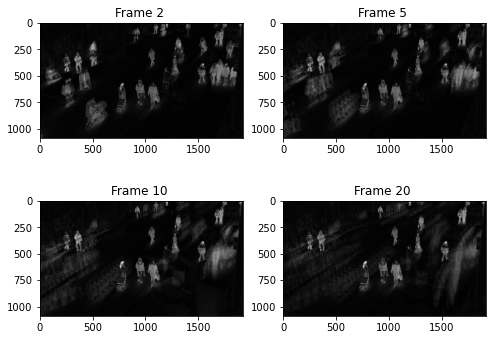

In [27]:
print('The result of average method')
Subtract_background(images,[2,5,10,20],test_frame2,plot=True,method=average)

The result of median method


[array([[ 3,  2,  2, ...,  2,  3,  1],
        [ 4,  5,  5, ...,  2,  3,  1],
        [ 9,  9,  2, ...,  2,  3,  1],
        ...,
        [45, 44, 45, ...,  1,  7,  1],
        [37, 36, 37, ...,  2,  7,  1],
        [35, 36, 36, ...,  4,  1,  3]], dtype=uint8),
 array([[ 2,  1,  2, ...,  2,  2,  0],
        [ 4,  4,  4, ...,  3,  3,  0],
        [ 9,  6,  2, ...,  2,  2,  0],
        ...,
        [37, 35, 37, ...,  4,  7,  4],
        [36, 35, 34, ...,  4, 14,  4],
        [26, 22, 22, ...,  5,  6,  6]], dtype=uint8),
 array([[ 1,  1,  2, ...,  2,  2,  1],
        [ 4,  1,  3, ...,  2,  3,  1],
        [ 7,  1,  8, ...,  2,  2,  1],
        ...,
        [ 8,  8,  4, ...,  4,  7,  9],
        [ 4,  2,  4, ...,  4, 13, 12],
        [ 2,  2,  2, ...,  5,  4, 12]], dtype=uint8),
 array([[ 1,  2,  2, ...,  5,  1,  5],
        [ 4,  2,  4, ...,  5,  4,  4],
        [ 8,  4,  4, ...,  5,  0,  2],
        ...,
        [ 5,  3,  2, ...,  3,  8, 10],
        [ 2,  2,  2, ...,  4,  9, 11],
      

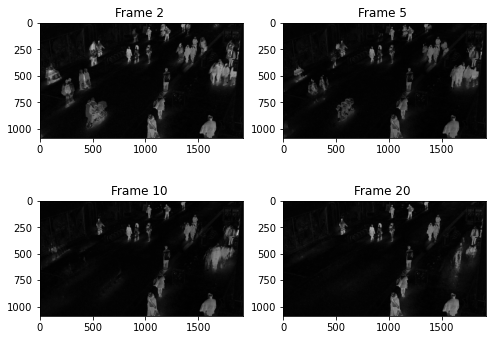

In [29]:
print('The result of median method')
Subtract_background(images, [2, 5, 10, 20], test_frame1, plot=True, method=median)

The result of median method


[array([[ 7,  7,  2, ...,  2,  5,  1],
        [ 2,  4,  3, ...,  3,  7,  1],
        [ 9, 13,  8, ...,  2,  5,  1],
        ...,
        [46, 45, 49, ...,  7,  9,  7],
        [38, 41, 41, ...,  4,  3,  2],
        [36, 41, 41, ...,  6,  3,  4]], dtype=uint8),
 array([[ 6,  6,  1, ...,  3,  5,  2],
        [ 2,  2,  1, ...,  3,  6,  2],
        [ 9, 11,  6, ...,  3,  5,  2],
        ...,
        [38, 36, 42, ..., 12,  9, 10],
        [37, 39, 39, ...,  6, 10,  4],
        [27, 26, 26, ...,  7, 10,  7]], dtype=uint8),
 array([[ 5,  5,  1, ...,  3,  5,  1],
        [ 2,  1,  1, ...,  3,  6,  1],
        [ 7,  6,  1, ...,  3,  5,  2],
        ...,
        [ 9,  9,  9, ..., 12, 10, 15],
        [ 5,  5,  9, ...,  6,  9, 12],
        [ 1,  5,  5, ...,  6,  9, 12]], dtype=uint8),
 array([[ 4,  5,  1, ...,  1,  3,  3],
        [ 2,  1,  1, ...,  4,  4,  2],
        [ 8,  9,  2, ...,  1,  4,  1],
        ...,
        [ 6,  4,  5, ..., 11, 11, 17],
        [ 1,  3,  3, ...,  6,  6, 12],
      

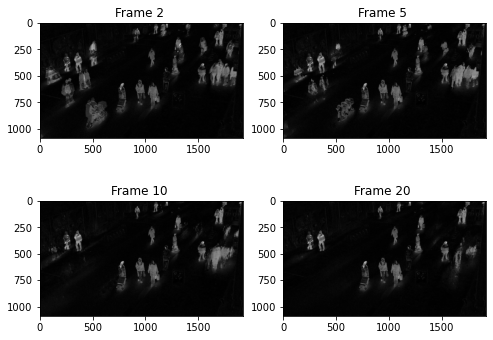

In [30]:
print('The result of median method')
Subtract_background(images, [2, 5, 10, 20], test_frame2, plot=True, method=median)

# c

In [75]:
def foreground_mask(images, frameIds, frame, method , plot=False):
    foregrounds = Subtract_background(images, frameIds, frame, method ,plot=False)
    foreground_masks = []
    thresholds = [65,30,90,50]
    for i in range(len(foregrounds)):
        _, threshold = cv2.threshold(foregrounds[i].astype('float32'), thresholds[i], 255, cv2.THRESH_BINARY)
        foreground_masks.append(threshold)
    if plot:
        fig, ax = plt.subplots(2,2, figsize=(8,6))
        for i in range(4):
            ax[i//2, i-2*(i//2)].imshow(foreground_masks[i], cmap="gray")
            ax[i//2, i-2*(i//2)].set_title('Frame %s '%frameIds[i] +' threshold %s' %thresholds[i])    
    return foreground_masks

In [76]:
files = glob.glob("frames\\*.png")
files.sort()
images = []
for f in files:
    img = cv2.imread(f)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    images.append(img)
images = np.array(images)

# import test frame
test_frame1 = cv2.imread("tests\\pedestrians_test_01.png")
test_frame1 = cv2.cvtColor(test_frame1, cv2.COLOR_BGR2RGB)

test_frame2 = cv2.imread("tests\\pedestrians_test_02.png")
test_frame2 = cv2.cvtColor(test_frame2, cv2.COLOR_BGR2RGB)

The result of average method


[array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([[  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        ...,
        [255., 255., 255., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.]], dtype=float32),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
      

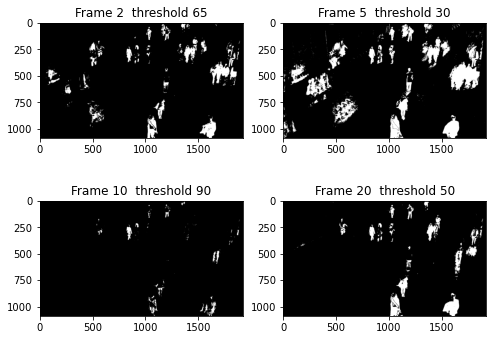

In [59]:
print('The result of average method')
foreground_mask(images,[2,5,10,20],test_frame1,plot=True,method=average)

The result of average method


[array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([[  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        ...,
        [255., 255., 255., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.]], dtype=float32),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
      

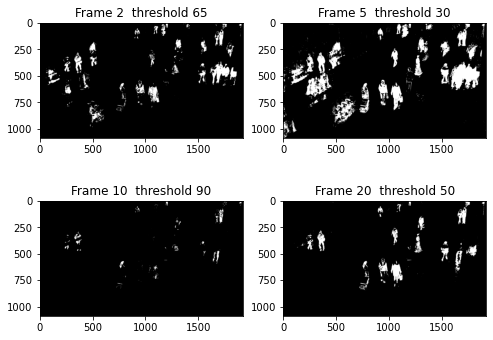

In [60]:
print('The result of average method')
foreground_mask(images,[2,5,10,20],test_frame2,plot=True,method=average)

The result of median method


[array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([[  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        ...,
        [255., 255., 255., ...,   0.,   0.,   0.],
        [255., 255., 255., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.]], dtype=float32),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
      

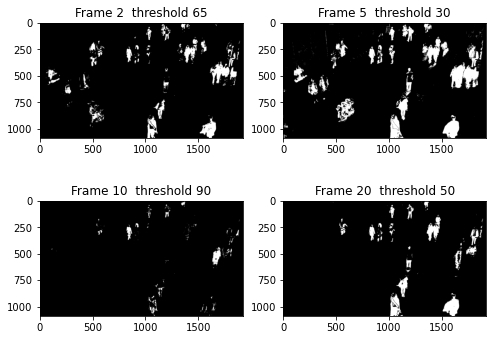

In [62]:
print('The result of median method')
foreground_mask(images, [2, 5, 10, 20], test_frame1, plot=True, method=median)

The result of median method


[array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],


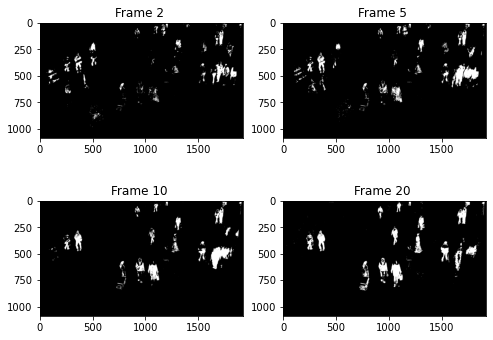

In [50]:
print('The result of median method')
foreground_mask(images, [2, 5, 10, 20], test_frame2, plot=True, method=median)

# d

In [77]:
def extract_foreground(images,  frameIds, frame, method, plot=False):
    foreground_masks =foreground_mask(images, frameIds, frame, method)
    foreground  = []
    
    for f in  foreground_masks:
        frame[np.where(f == 0)] = (0,0,0)
        foreground.append(frame)
        
    if plot:
        fig, ax = plt.subplots(2,2, figsize=(8,6))
        for i in range(4):
            ax[i//2, i-2*(i//2)].imshow(foreground[i])
            ax[i//2, i-2*(i//2)].set_title('Frame = %s '%frameIds[i])    

    return foreground

In [78]:
files = glob.glob("frames\\*.png")
files.sort()
images = []
for f in files:
    img = cv2.imread(f)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    images.append(img)
images = np.array(images)

# import test frame
test_frame1 = cv2.imread("tests\\pedestrians_test_01.png")
test_frame1 = cv2.cvtColor(test_frame1, cv2.COLOR_BGR2RGB)

test_frame2 = cv2.imread("tests\\pedestrians_test_02.png")
test_frame2 = cv2.cvtColor(test_frame2, cv2.COLOR_BGR2RGB)

method is average


[array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        ...,
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]], dtype=uint8),
 array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 

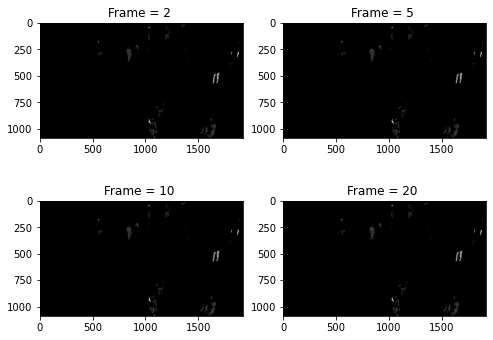

In [65]:
print('method is average')
extract_foreground(images,[2,5,10,20],test_frame1,plot=True,method=average)

method is average


[array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        ...,
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]], dtype=uint8),
 array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 

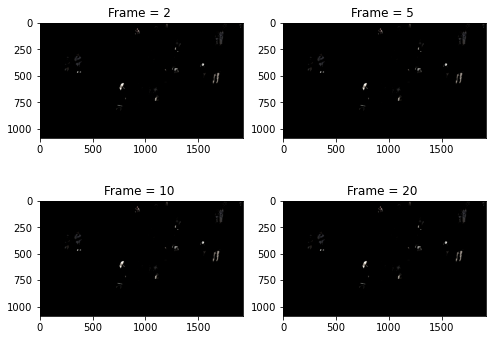

In [66]:
print('method is average')
extract_foreground(images,[2,5,10,20],test_frame2,plot=True,method=average)

method is median


[array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        ...,
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]], dtype=uint8),
 array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 

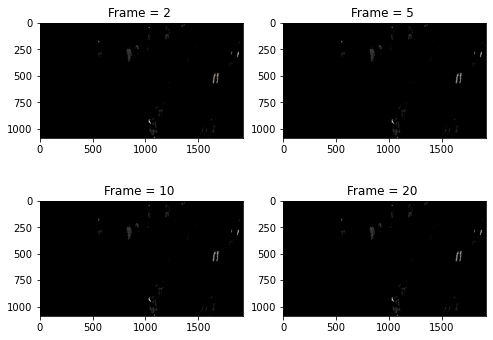

In [67]:
print('method is median')
extract_foreground(images, [2, 5, 10, 20], test_frame1, plot=True, method=median)

method is median


[array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        ...,
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]], dtype=uint8),
 array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 

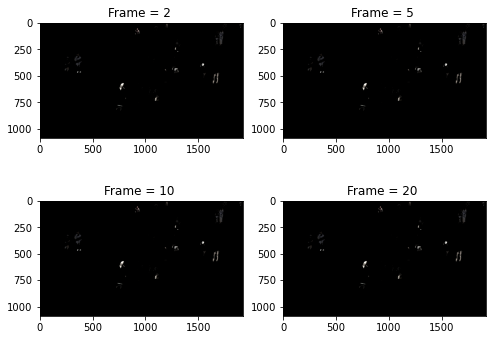

In [68]:
print('method is median')
extract_foreground(images, [2, 5, 10, 20], test_frame2, plot=True, method=median)

# f

In [104]:
def number_pedestrians(images, frameIds, frame, method , plot=False):
    
    exf = extract_foreground(images,  frameIds, frame, method, plot=False)
    pedestrians =[]
    counter=[]
    for mask in exf:
        count=0
        result = cv2.GaussianBlur(mask, (5, 5), 0)
        result = cv2.cvtColor(result, cv2.COLOR_BGR2GRAY)
    
        #find all boundary points(x,y) of an object in the image
        contours, hierarchy = cv2.findContours(result, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        for c in contours:
            x, y, w, h = cv2.boundingRect(c)
            if w > 30 and h > 50:
                cv2.rectangle(result, (x,y), (x + w, y + h), (255, 255, 0), 3)
                count += 1
        pedestrians.append(result)
        counter.append(count)
        
    if plot:
         
        fig, ax = plt.subplots(2,2,figsize=(8,6))
        for i in range(4):
            ax[i//2, i-2*(i//2)].imshow(pedestrians[i])
            ax[i//2, i-2*(i//2)].set_title('Frame %s , #pedestrians %s '%(frameIds[i],counter[i]))    
    return pedestrians, counter

In [102]:
files = glob.glob("frames\\*.png")
files.sort()
images = []
for f in files:
    img = cv2.imread(f)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    images.append(img)
images = np.array(images)

test_frame1 = cv2.imread("tests\\pedestrians_test_01.png")
test_frame1 = cv2.cvtColor(test_frame1, cv2.COLOR_BGR2RGB)

test_frame2 = cv2.imread("tests\\pedestrians_test_02.png")
test_frame2 = cv2.cvtColor(test_frame2, cv2.COLOR_BGR2RGB)

The result of average method


([array([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
  array([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
  array([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
  array([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)],
 [9, 9, 9, 9])

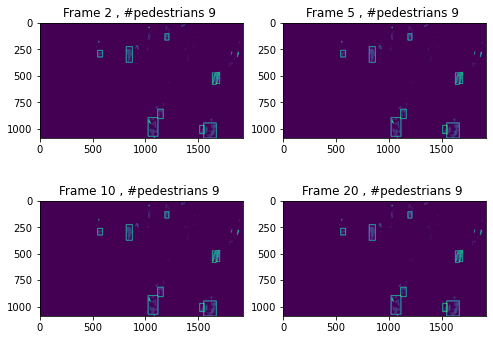

In [105]:
print('The result of average method')
number_pedestrians(images, [2, 5, 10, 20], test_frame1, plot=True, method=average)

The result of average method


([array([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
  array([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
  array([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
  array([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)],
 [10, 10, 10, 10])

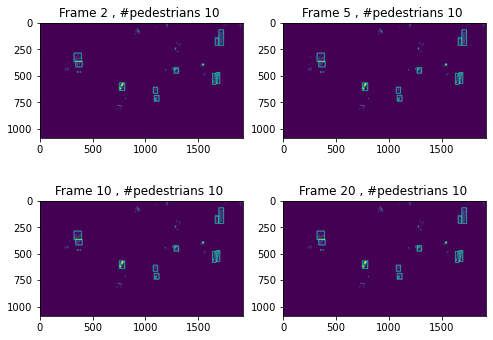

In [106]:
print('The result of average method')
number_pedestrians(images, [2, 5, 10, 20], test_frame2, plot=True, method=average)

The result of median method


([array([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
  array([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
  array([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
  array([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)],
 [9, 9, 9, 9])

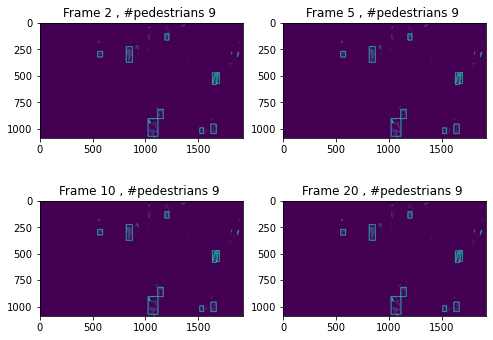

In [110]:
print('The result of median method')
number_pedestrians(images, [2, 5, 10, 20], test_frame1, plot=True, method=median)

The result of median method


([array([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
  array([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
  array([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
  array([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)],
 [8, 8, 8, 8])

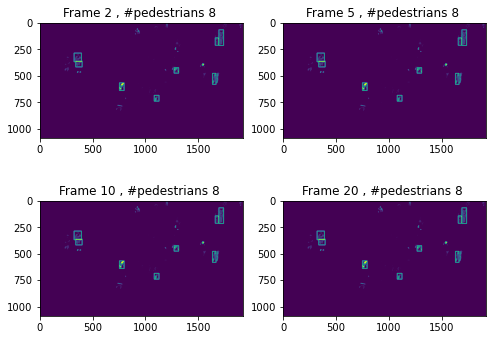

In [109]:
print('The result of median method')
number_pedestrians(images, [2, 5, 10, 20], test_frame2, plot=True, method=median)